In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('D:\\prasad\\practice\\My Working Projects\\Completed\\Titanic Dataset Analysis')

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [5]:
df.shape

(891, 15)

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [8]:
df.alone.unique()

array([False,  True])

In [9]:
df.alone.value_counts()

True     537
False    354
Name: alone, dtype: int64

In [10]:
df.drop(['who','alone','embark_town','adult_male','deck','fare','parch','embarked','class','alive'],axis=1,inplace=True)

In [11]:
df.head(2)

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,38.0,1


In [12]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [13]:
sex_map={'male':1, 'female':0}

In [14]:
df['sex']=df['sex'].map(sex_map)

In [15]:
df.head()

,survived,pclass,sex,age,sibsp
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0


<AxesSubplot:xlabel='survived', ylabel='count'>

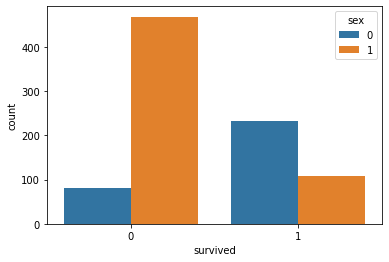

In [16]:
sns.countplot(df['survived'],hue='sex',data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

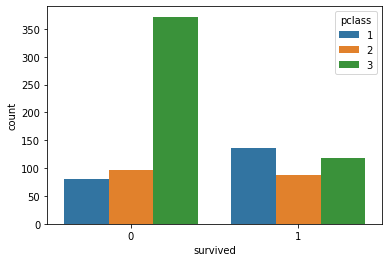

In [17]:
sns.countplot(df['survived'],hue='pclass',data=df)

In [18]:
df.sibsp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

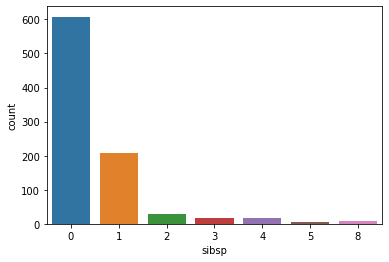

In [19]:
sns.countplot(df['sibsp'])

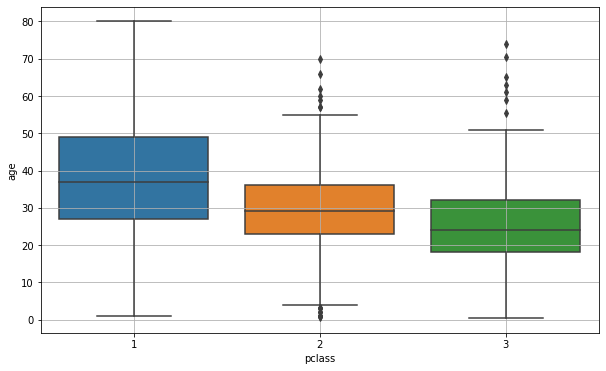

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(df['pclass'],df['age'])
plt.grid()
plt.show()

In [21]:
df.head(2)

,survived,pclass,sex,age,sibsp
0,0,3,1,22.0,1
1,1,1,0,38.0,1


In [22]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
dtype: int64

In [23]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [24]:
df[df.loc[:,'pclass']==1]['age'].replace(np.nan,df[df.loc[:,'pclass']==1]['age'].median())

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: age, Length: 216, dtype: float64

In [25]:
df_median=df.copy()
for var in df['pclass'].unique():
    df_median.update(df[df.loc[:,'pclass']==var]['age'].replace(np.nan,df[df.loc[:,'pclass']==var]['age'].median()))

In [26]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
dtype: int64

In [27]:
df_median.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
dtype: int64

In [28]:
df=df_median

In [29]:
df.head(2)

,survived,pclass,sex,age,sibsp
0,0,3,1,22.0,1
1,1,1,0,38.0,1


In [30]:
X=df.drop('survived',axis=1)
X.head(2)

,pclass,sex,age,sibsp
0,3,1,22.0,1
1,1,0,38.0,1


In [31]:
y=df['survived']
y.head(2)

0    0
1    1
Name: survived, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 4), (179, 4), (712,), (179,))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [36]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('accuracy_score:',accuracy_score(y_test,y_pred))

accuracy_score: 0.8156424581005587


In [37]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('accuracy_score:',accuracy_score(y_test,y_pred))

accuracy_score: 0.8212290502793296


<AxesSubplot:xlabel='survived'>

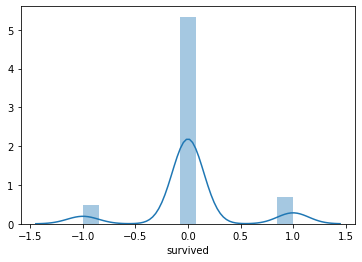

In [38]:
sns.distplot(y_test-y_pred)

<AxesSubplot:xlabel='survived'>

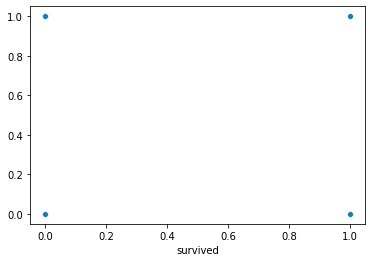

In [39]:
sns.scatterplot(y_test,y_pred)

### Save Model in Pickle & Joblib

In [40]:
import pickle,joblib

In [41]:
pickle.dump(lr,open('titanic_pickle','wb'))

In [42]:
joblib.dump(lr,'titanic_joblib')

['titanic_joblib']

### Load Pickle Model

In [43]:
model_pkl=pickle.load(open('titanic_pickle','rb'))

In [44]:
model_pkl.score(X_test,y_test)

0.8156424581005587

In [45]:
model_pkl.score(X_train,y_train)

0.7935393258426966

### Load Joblib Model

In [46]:
model_jbl=joblib.load('titanic_joblib')

In [47]:
model_jbl.score(X_test,y_test)

0.8156424581005587

In [48]:
model_jbl.score(X_train,y_train)

0.7935393258426966